In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Set up the parameters

In [2]:
# parameters
S0 = 100
N = 10 ** 6 #Initial number of stocks
T = 1; 
k = 1e-3;
b = 1e-3
M = 1000;    #Number of trading times
alpha = 0.1; 
phi = 0.01;
sigma = 0.30;

### Calculate the rest parameters

In [3]:
gamma = np.sqrt(phi/k);
xi = (alpha - 0.5 * b + np.sqrt(k * phi))/(alpha - 0.5 * b - np.sqrt(k * phi));

In [4]:
tt = np.linspace(0, 1, M + 1)

### Optimal Trading Speed and Inventory Process

In [5]:
v = np.zeros((M + 1, 1))
q = np.zeros((M + 1, 1))
v[0] = 0
q[0] = N  
for t in range(1, M + 1): 
    v[t] = gamma * (xi * np.exp(gamma * (T-tt[t-1])) + np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) * q[t-1] * T/M
    q[t] = (xi * np.exp(gamma * (T-tt[t-1])) - np.exp(- gamma * (T-tt[t-1]))) / (xi * np.exp(gamma * T) - np.exp(- gamma * T)) * N

Text(0.5, 1.0, 'Trading Speed')

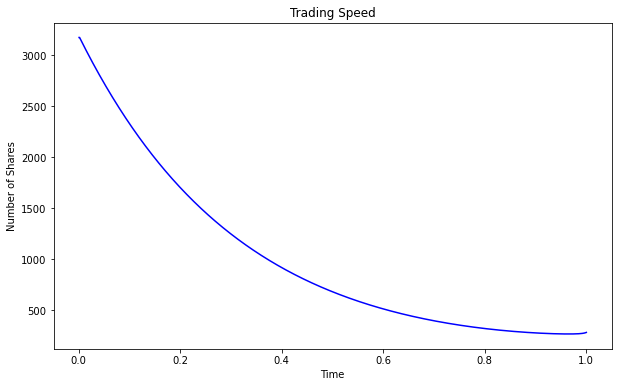

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], v[1:], 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Trading Speed')

Text(0.5, 1.0, 'Inventory')

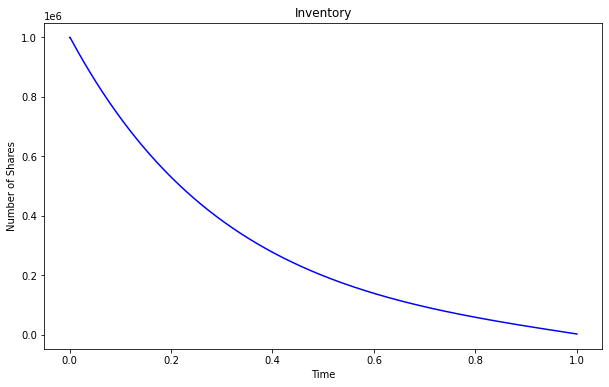

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(tt, q, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.title('Inventory')

### Stock price simulation and plot

In [8]:
S = np.zeros((M + 1, 1))
S[0] = S0 
rn = np.random.standard_normal(S.shape) 
for t in range(1, M + 1): 
    S[t] = S[t-1] - b * v[t] * T/M + sigma * np.sqrt(T/M) * rn[t]

Text(0.5, 1.0, 'Stock Price')

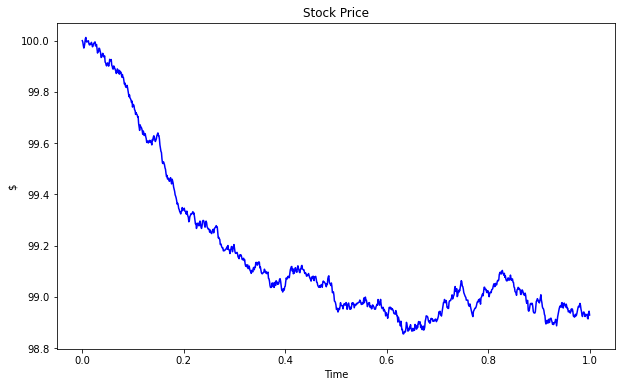

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

### Revenue process

In [10]:
R = np.zeros((M + 1, 1))
R[0] = 0
for t in range(1, M + 1): 
    R[t] = R[t-1] +  (S[t] - k * v[t]) * v[t]

Text(0.5, 1.0, 'Revenue')

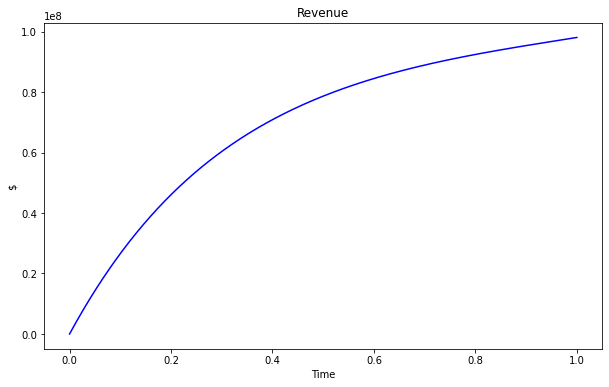

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(tt, R, 'b', lw=1.5)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Revenue')